In [1]:
# The following is to know when this notebook has been run and with which python version.
import time, sys
print(time.ctime())
print(sys.version.split('|')[0])

Sun Oct  1 09:11:13 2023
3.9.16 (main, Jan 11 2023, 10:02:19) 
[Clang 14.0.6 ]


# G Object Oriented Programation. Objects, classes, etc...

This is part of the Python lecture given by Christophe Morisset at IA-UNAM. More informations at: https://github.com/Morisset/Python-lectures-Notebooks

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os # We will need this latter
from scipy.integrate import simps
from urllib.request import urlopen

We want here to make some plots of atmosphere models that will be downloaded from internet. We need:
    
* Download the file
* read it
* plot it

This can all be done in functions, and also in object.

### Functions

Let's first see the way we can do it with functions:

The files are located there: http://astro.uni-tuebingen.de/~rauch/TMAF/flux_He+C+N+O.html

For exemple, a file is: http://astro.uni-tuebingen.de/~rauch/TMAF/NLTE/He+C+N+O/0050000_7.00_33_50_02_15.bin_0.1.gz
We can download it using urllib2, putting this into a function:

In [3]:
def dlfile(filename):
    stel_file = urlopen('http://astro.uni-tuebingen.de/~rauch/TMAF/NLTE/He+C+N+O/' + filename)
    output = open(filename,'wb') #the file where we will put the data. b stands for binary, as it is a gzip file
    output.write(stel_file.read()) # the reading of the distant file is redirected to the writting of the local one
    output.close()

In [4]:
filename = '0050000_7.00_33_50_02_15.bin_0.1.gz'
dlfile(filename)

In [5]:
! ls -lh *gz

-rw-r--r--  1 christophemorisset  staff    87K Dec  1  2020 0040000_6.00_33_50_02_15.bin_0.1.gz
-rw-r--r--  2 christophemorisset  staff    84K Oct  1 09:11 0050000_7.00_33_50_02_15.bin_0.1.gz
-rw-r--r--  1 christophemorisset  staff    88K Dec  1  2020 0090000_6.00_33_50_02_15.bin_0.1.gz
-rw-r--r--  1 christophemorisset  staff    88K Dec  7  2020 0100000_6.00_33_50_02_15.bin_0.1.gz
-rw-r--r--  1 christophemorisset  staff    87K Dec  1  2020 0140000_6.00_33_50_02_15.bin_0.1.gz
-rw-r--r--  1 christophemorisset  staff    87K Dec  1  2020 0190000_6.00_33_50_02_15.bin_0.1.gz
-rw-------  1 christophemorisset  staff   4.0M May 31  2016 CALIFA_ah7.dat.gz
-rw-------@ 1 christophemorisset  staff   1.2M May 31  2016 MySQL.pdf.gz


In [6]:
data = np.genfromtxt(filename, comments='*', names='wl, fl') # genfromtxt can read gzip files

In [7]:
data

array([(   5. , 4.596e-20), (   5.1, 3.524e-19), (   5.2, 2.475e-18), ...,
       (1999.8, 1.242e+18), (1999.9, 1.242e+18), (2000. , 1.241e+18)],
      dtype=[('wl', '<f8'), ('fl', '<f8')])

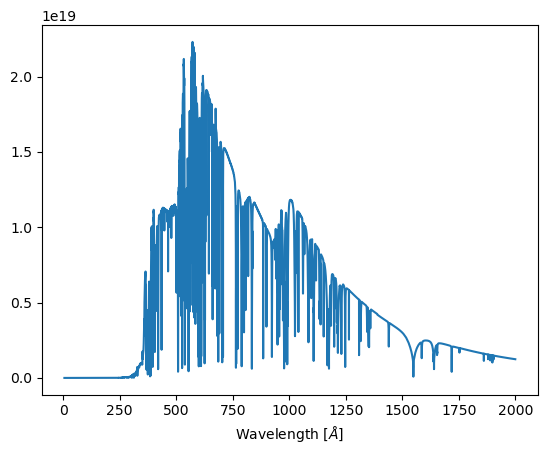

In [8]:
f, ax = plt.subplots()
ax.plot(data['wl'], data['fl']) # let's have a look at the data
ax.set_xlabel(r'Wavelength [$\AA$]');

If we want to overplot another file, we only have to download it and follow the same process:

In [9]:
filename2 = '0110000_7.00_33_50_02_15.bin_0.1.gz'
dlfile(filename2)

In [10]:
data2 = np.genfromtxt(filename2, comments='*', names='wl, fl') # data and data2 contains the 2 different data sets

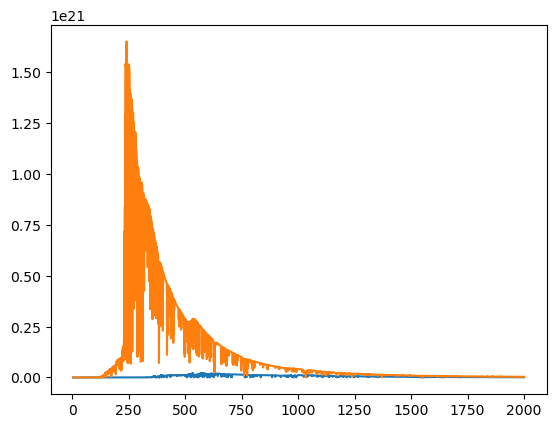

In [11]:
f, ax = plt.subplots()
ax.plot(data['wl'], data['fl'])
ax.plot(data2['wl'], data2['fl']);

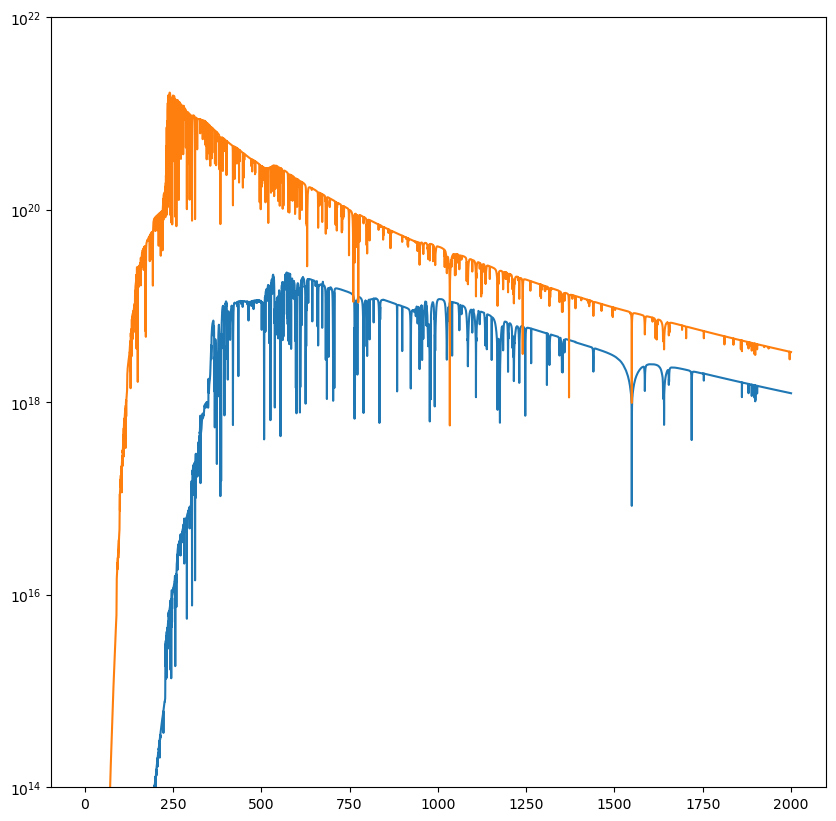

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(data['wl'], data['fl'])
ax.plot(data2['wl'], data2['fl'])
ax.set_yscale('log')
ax.set_ylim(1e14, 1e22);

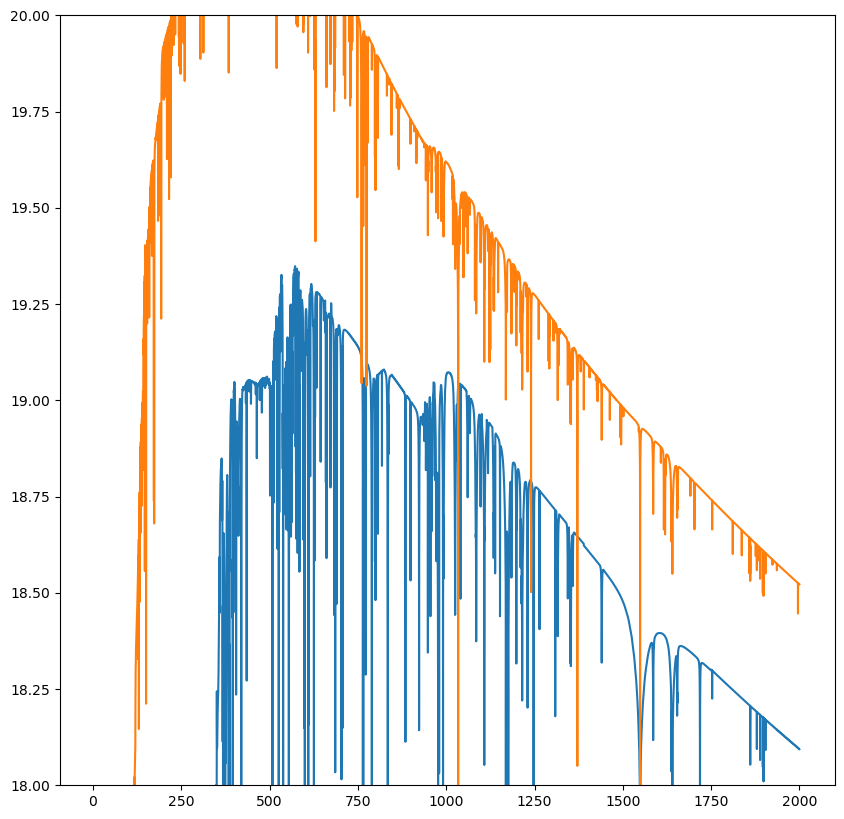

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(data['wl'], np.log10(data['fl']))
ax.plot(data2['wl'], np.log10(data2['fl']))
ax.set_ylim(18, 20);

Great, but it would be better if everything were in the same place. Making a function more complete that deal with everything:

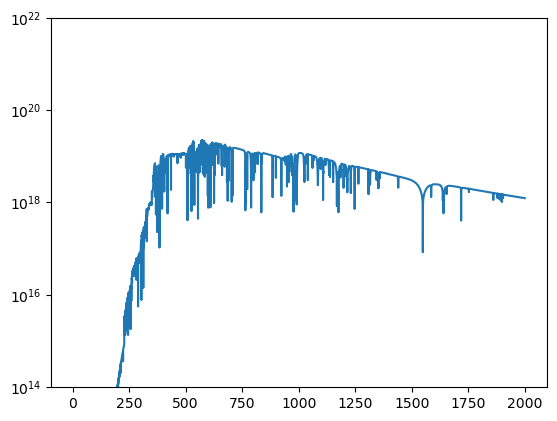

In [14]:
def plot_spr(filename):
    dlfile(filename) # download the file
    data = np.genfromtxt(filename, comments='*', names='wl, fl') # read it
    fig, ax = plt.subplots()
    ax.plot(data['wl'], data['fl']) # plot it
    ax.set_yscale('log') # use log axes
    ax.set_ylim(1e14, 1e22)
plot_spr(filename)

The main problem here is to superimpose the 2 plots. We can define the axis object outside and send it to the function:

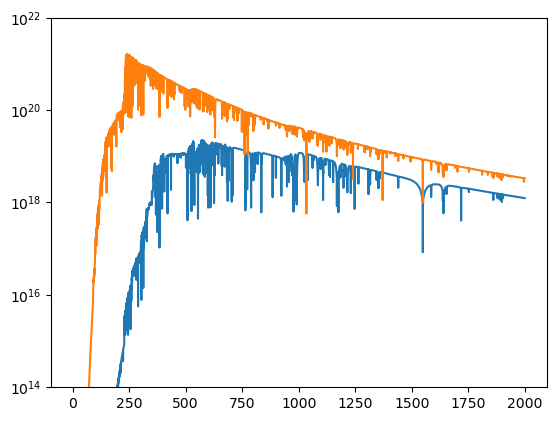

In [15]:
def plot_spr(filename, ax=None): # default is no axis sent to the function
    dlfile(filename)
    data = np.genfromtxt(filename, comments='*', names='wl, fl')
    if ax is None: # make a figue if no axis is passed to the function
        fig, ax = plt.subplots()
    ax.plot(data['wl'], data['fl'])
    ax.set_yscale('log')
    ax.set_ylim(1e14, 1e22)
    
fig, ax = plt.subplots() # the figure and axis is buildt before calling the plotting function
plot_spr(filename, ax=ax) # sending axis let the plots appear on the same figure
plot_spr(filename2, ax=ax);

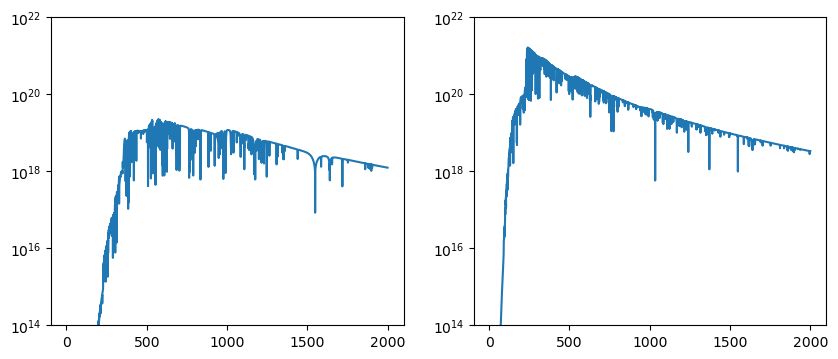

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4)) # the figure and axis is buildt before calling the plotting function
plot_spr(filename, ax=ax1) # sending axis let the plots appear on the same figure
plot_spr(filename2, ax=ax2)

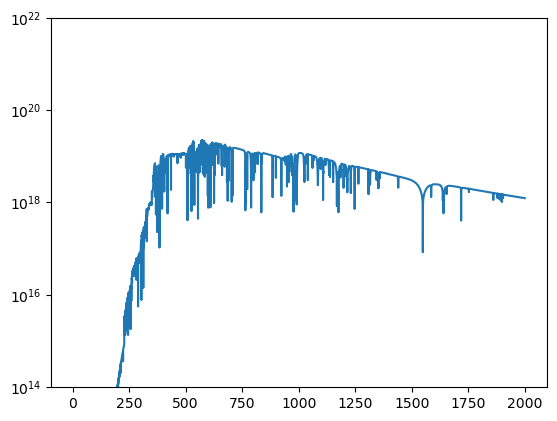

In [17]:
# plot_spr is a function, but there is no return command. It nevertheless return None.
a = plot_spr(filename)

In [18]:
print(a)

None


But now that everything is compact, we don't have access to the data, they are INSIDE the function...

### Classes and Objects

It's time to make a class and to instantiate objects.
Classes are intelligent containers. The can hold variables and functions (called methods).
The following terminology is from http://www.tutorialspoint.com/python/python_classes_objects.htm:


* *Class*: A user-defined prototype for an object that defines a set of attributes that characterize any object of the class. The attributes are data members (class variables and instance variables) and methods, accessed via dot notation.
* *Class variable or attribute*: A variable that is shared by all instances of a class. Class variables are defined within a class but outside any of the class's methods. Class variables aren't used as frequently as instance variables are.
* *Data member*: A class variable or instance variable that holds data associated with a class and its objects.
* *Function overloading*: The assignment of more than one behavior to a particular function. The operation performed varies by the types of objects (arguments) involved.
* *Instance variable or attribute*: A variable that is defined inside a method and belongs only to the current instance of a class.
* *Inheritance* : The transfer of the characteristics of a class to other classes that are derived from it.
* *Instance*: An individual object of a certain class. An object obj that belongs to a class Circle, for example, is an instance of the class Circle.
* *Instantiation* : The creation of an instance of a class.
* *Method* : A special kind of function that is defined in a class definition.
* *Object* : A unique instance of a data structure that's defined by its class. An object comprises both data members (class variables and instance variables) and methods.
* *Operator overloading*: The assignment of more than one function to a particular operator.

In [19]:
class Stel_Spectrum(object):
    """
    This object downloads a file from http://astro.uni-tuebingen.de/~rauch/TMAF/NLTE/He+C+N+O/
    and is able to make some plots.    
    """
    def __init__(self, filename): # This function will be called at the instantiation of any object.
        self.filename = filename # we put the file name value into an instance variable. That allows any method to access it.
        self._dlfile() # calling a method (defined below). No need for argument, as filename is known
        self.data = np.genfromtxt(self.filename, comments='*', names='wl, fl') # reading the data into an istance variable.
        
    def _dlfile(self): # method.
        if not os.path.exists(self.filename): # only donwload if not yet on the disk
            stel_file = urlopen('http://astro.uni-tuebingen.de/~rauch/TMAF/NLTE/He+C+N+O/' + 
                                        self.filename)
            output = open(self.filename,'wb')
            output.write(stel_file.read())
            output.close()
            
    def plot_spr(self, ax=None): # another method. Used to plot
        if ax is None:
            fig, ax = plt.subplots()
        else:
            fig = plt.gcf()
        ax.plot(self.data['wl'], self.data['fl'])
        ax.set_yscale('log')
        ax.set_ylim(1e14, 1e22)

In [20]:
sp1 = Stel_Spectrum(filename) # instantiation of an object from the Stel_Spectrum class
sp2 = Stel_Spectrum(filename2) # another object. They have the same structure, but hols different data

In [21]:
print(sp1.filename) # access the instance variable
print(sp2.filename)

0050000_7.00_33_50_02_15.bin_0.1.gz
0110000_7.00_33_50_02_15.bin_0.1.gz


In [22]:
#sp1.TAB

In [23]:
sp2.data # the data are available.

array([(   5. , 1.028e+03), (   5.1, 2.393e+03), (   5.2, 5.362e+03), ...,
       (1999.8, 3.328e+18), (1999.9, 3.327e+18), (2000. , 3.326e+18)],
      dtype=[('wl', '<f8'), ('fl', '<f8')])

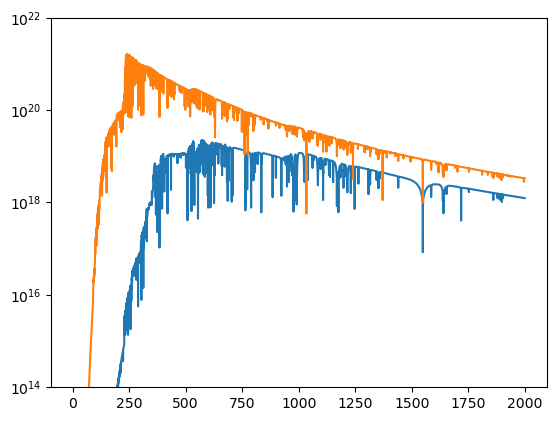

In [24]:
fig, ax = plt.subplots()
sp1.plot_spr(ax=ax) # calling the metod
sp2.plot_spr(ax=ax)

In [25]:
len(sp1.data) # the data from the object are like any other data.

19951

We can add comments and a method that gives information about the object itself.

In [26]:
class Stel_Spectrum(object):
    """
    This object downloads a file from http://astro.uni-tuebingen.de/~rauch/TMAF/NLTE/He+C+N+O/
    and is able to make some plots.    
    """
    def __init__(self, filename):
        """
        Initialisation of the Stel_Spectrum object.
        Parameter:
            - filename e.g. 0050000_7.00_33_50_02_15.bin_0.1.gz
        """
        self.filename = filename
        self.dlfile()
        self.data = np.genfromtxt(filename, comments='*', names='wl, fl')
        
    def dlfile(self):
        """
        Downloading file if not already here
        """
        if not os.path.exists(self.filename):
            print('Downloading {}.'.format(self.filename))
            stel_file = urlopen('http://astro.uni-tuebingen.de/~rauch/TMAF/NLTE/He+C+N+O/' + self.filename)
            output = open(self.filename,'wb')
            output.write(stel_file.read())
            output.close()
        else:
            print('{} already on disk.'.format(self.filename))
            
    def plot_spr(self, ax=None):
        """
        Plot the spectrum.
        Parameter:
            - ax: an axis (optionnal). If None or absent, axis is created
        """
        if ax is None:
            fig, ax = plt.subplots()
        ax.plot(self.data['wl'], self.data['fl'])
        ax.set_yscale('log')
        ax.set_ylim(1e14, 1e22)
        
    def print_info(self):
        """
        Print out the filename and the number of points
        """
        print('Filename: {0}, number of points: {1}'.format(self.filename, len(self.data)))

In [27]:
sp1 = Stel_Spectrum(filename) # we have to instatiate again to take the changes into account
sp2 = Stel_Spectrum(filename2)
sp1.print_info()
sp2.print_info()

0050000_7.00_33_50_02_15.bin_0.1.gz already on disk.
0110000_7.00_33_50_02_15.bin_0.1.gz already on disk.
Filename: 0050000_7.00_33_50_02_15.bin_0.1.gz, number of points: 19951
Filename: 0110000_7.00_33_50_02_15.bin_0.1.gz, number of points: 19951


In [28]:
help(sp1) # the comments are easily accessible

Help on Stel_Spectrum in module __main__ object:

class Stel_Spectrum(builtins.object)
 |  Stel_Spectrum(filename)
 |  
 |  This object downloads a file from http://astro.uni-tuebingen.de/~rauch/TMAF/NLTE/He+C+N+O/
 |  and is able to make some plots.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, filename)
 |      Initialisation of the Stel_Spectrum object.
 |      Parameter:
 |          - filename e.g. 0050000_7.00_33_50_02_15.bin_0.1.gz
 |  
 |  dlfile(self)
 |      Downloading file if not already here
 |  
 |  plot_spr(self, ax=None)
 |      Plot the spectrum.
 |      Parameter:
 |          - ax: an axis (optionnal). If None or absent, axis is created
 |  
 |  print_info(self)
 |      Print out the filename and the number of points
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the

In [29]:
help(sp1.plot_spr)

Help on method plot_spr in module __main__:

plot_spr(ax=None) method of __main__.Stel_Spectrum instance
    Plot the spectrum.
    Parameter:
        - ax: an axis (optionnal). If None or absent, axis is created



In [30]:
sp1.plot_spr?

Signature: sp1.plot_spr(ax=None)
Docstring:
Plot the spectrum.
Parameter:
    - ax: an axis (optionnal). If None or absent, axis is created
File:      /var/folders/7b/7gktm_g91hn54p3gxj15kb1m0000gn/T/ipykernel_15628/1759916403.py
Type:      method


In [31]:
print(sp1)

Adding more method and changing the name of the data to wl and fl. We can accept T and logg to define the filename and download it. Some error catching process are implemented. We laso add a method to compute the integrale of the flux over the wavelengths.

In [32]:
class Stel_Spectrum(object):
    """
    This object downloads a file from http://astro.uni-tuebingen.de/~rauch/TMAF/NLTE/He+C+N+O/
    and is able to make some plots.    
    """
    def __init__(self, filename=None, T=None, logg=None, verbose=False):
        """
        Initialisation of the Stel_Spectrum object.
        Parameter:
            - filename
            - T: temperature in K, e.g. 150000
            - logg: e.g. 7.5
        The wl attribute is an array of wavelengths in Angstrom.
        The fl attribute is the flux in erg/s/cm2/A
        """
        self.verbose = verbose
        if filename is None:
            if T is not None and logg is not None:
                self.T = T
                self.logg = logg
                self.filename = '0{0:06.0f}_{1:.2f}_33_50_02_15.bin_0.1.gz'.format(self.T, self.logg)
            else:
                raise TypeError("T and logg must be given")
        else:
            self.filename = filename
            self.T = float(filename.split('_')[0])
            self.logg = float(filename.split('_')[1])
        self.dlfile()
        if self.file_found:
            data = np.genfromtxt(self.filename, comments='*', names='wl, fl')
            self.fl = data['fl']
            self.wl = data['wl'] # in A
            self.fl /= 1e8 # F LAMBDA  GIVEN IN ERG/CM**2/SEC/CM -> erg/s/cm2/A
            if self.verbose:
                print('Data from {} read.'.format(self.filename))
        else:
            self.wl = None
            self.fl = None
            
    def dlfile(self):
        """
        Downloading file if not already here. Put it in the curremt directory
        """
        if not os.path.exists(self.filename):
            if self.verbose:
                print('Try to download {}'.format(self.filename))
            try:
                stel_file = urlopen('http://astro.uni-tuebingen.de/~rauch/TMAF/NLTE/He+C+N+O/' + 
                                            self.filename)
                output = open(self.filename,'wb')
                output.write(stel_file.read())
                output.close()
                self.file_found = True
            except:
                print('file {} not found'.format(self.filename))
                self.file_found = False
        else:
            self.file_found = True
                
    def plot_spr(self, ax=None):
        """
        Plot the spectrum.
        Parameter:
            - ax: an axis (optionnal). If Noe or absent, axis is created
        """
        if self.wl is None:
            print('No data to plot')
            return
        if ax is None:
            fig, ax = plt.subplots()
        ax.plot(self.wl, self.fl, label='T={0:.0f} kK, logg={1}'.format(self.T/1e3, self.logg))
        ax.set_yscale('log')
        ax.set_ylim(1e6, 1e14)
        ax.set_xlabel('Wavelength (A)')
        
    def print_info(self):
        """
        Print out the filename and the number of points
        """
        print(self.__repr__())
        
    def __repr__(self):
        """
        This is what is used when calling "print <obj>" or <obj> ENTER
        """
        if self.wl is None:
            return'Filename: {0}, No data'.format(self.filename)
        else:
            return'Filename: {0}, number of points: {1}'.format(self.filename, len(self.wl))
    
    def get_integ(self):
        """
        Return the integral of Flambda over lambda, in erg/s/cm2
        """
        if self.wl is None:
            if self.verbose:
                print('No data')
            return None
        return simps(self.fl, self.wl) # perform the integral
        

In [33]:
sp1 = Stel_Spectrum(T=130000, logg=6)
print(sp1)

Filename: 0130000_6.00_33_50_02_15.bin_0.1.gz, number of points: 19951


In [34]:
sp3 = Stel_Spectrum(T=330000, logg=6, verbose=True)
print(sp3)

Try to download 0330000_6.00_33_50_02_15.bin_0.1.gz
file 0330000_6.00_33_50_02_15.bin_0.1.gz not found
Filename: 0330000_6.00_33_50_02_15.bin_0.1.gz, No data


In [35]:
spectra = [] # we create an empty list
for T in np.linspace(40000, 190000, 16): # this is the list of available temperature (check the site)
    spectra.append(Stel_Spectrum(T=T, logg=6, verbose=True)) # we fill the list with the objects for each temperature

Data from 0040000_6.00_33_50_02_15.bin_0.1.gz read.
Try to download 0050000_6.00_33_50_02_15.bin_0.1.gz
Data from 0050000_6.00_33_50_02_15.bin_0.1.gz read.
Try to download 0060000_6.00_33_50_02_15.bin_0.1.gz
Data from 0060000_6.00_33_50_02_15.bin_0.1.gz read.
Try to download 0070000_6.00_33_50_02_15.bin_0.1.gz
Data from 0070000_6.00_33_50_02_15.bin_0.1.gz read.
Try to download 0080000_6.00_33_50_02_15.bin_0.1.gz
Data from 0080000_6.00_33_50_02_15.bin_0.1.gz read.
Data from 0090000_6.00_33_50_02_15.bin_0.1.gz read.
Data from 0100000_6.00_33_50_02_15.bin_0.1.gz read.
Try to download 0110000_6.00_33_50_02_15.bin_0.1.gz
Data from 0110000_6.00_33_50_02_15.bin_0.1.gz read.
Try to download 0120000_6.00_33_50_02_15.bin_0.1.gz
Data from 0120000_6.00_33_50_02_15.bin_0.1.gz read.
Data from 0130000_6.00_33_50_02_15.bin_0.1.gz read.
Data from 0140000_6.00_33_50_02_15.bin_0.1.gz read.
Try to download 0150000_6.00_33_50_02_15.bin_0.1.gz
Data from 0150000_6.00_33_50_02_15.bin_0.1.gz read.
Try to downl

In [36]:
spectra # the list hold 16 objects, each one with its own data and methods

[Filename: 0040000_6.00_33_50_02_15.bin_0.1.gz, number of points: 19951,
 Filename: 0050000_6.00_33_50_02_15.bin_0.1.gz, number of points: 19951,
 Filename: 0060000_6.00_33_50_02_15.bin_0.1.gz, number of points: 19951,
 Filename: 0070000_6.00_33_50_02_15.bin_0.1.gz, number of points: 19951,
 Filename: 0080000_6.00_33_50_02_15.bin_0.1.gz, number of points: 19951,
 Filename: 0090000_6.00_33_50_02_15.bin_0.1.gz, number of points: 19951,
 Filename: 0100000_6.00_33_50_02_15.bin_0.1.gz, number of points: 19951,
 Filename: 0110000_6.00_33_50_02_15.bin_0.1.gz, number of points: 19951,
 Filename: 0120000_6.00_33_50_02_15.bin_0.1.gz, number of points: 19951,
 Filename: 0130000_6.00_33_50_02_15.bin_0.1.gz, number of points: 19951,
 Filename: 0140000_6.00_33_50_02_15.bin_0.1.gz, number of points: 19951,
 Filename: 0150000_6.00_33_50_02_15.bin_0.1.gz, number of points: 19951,
 Filename: 0160000_6.00_33_50_02_15.bin_0.1.gz, number of points: 19951,
 Filename: 0170000_6.00_33_50_02_15.bin_0.1.gz, num

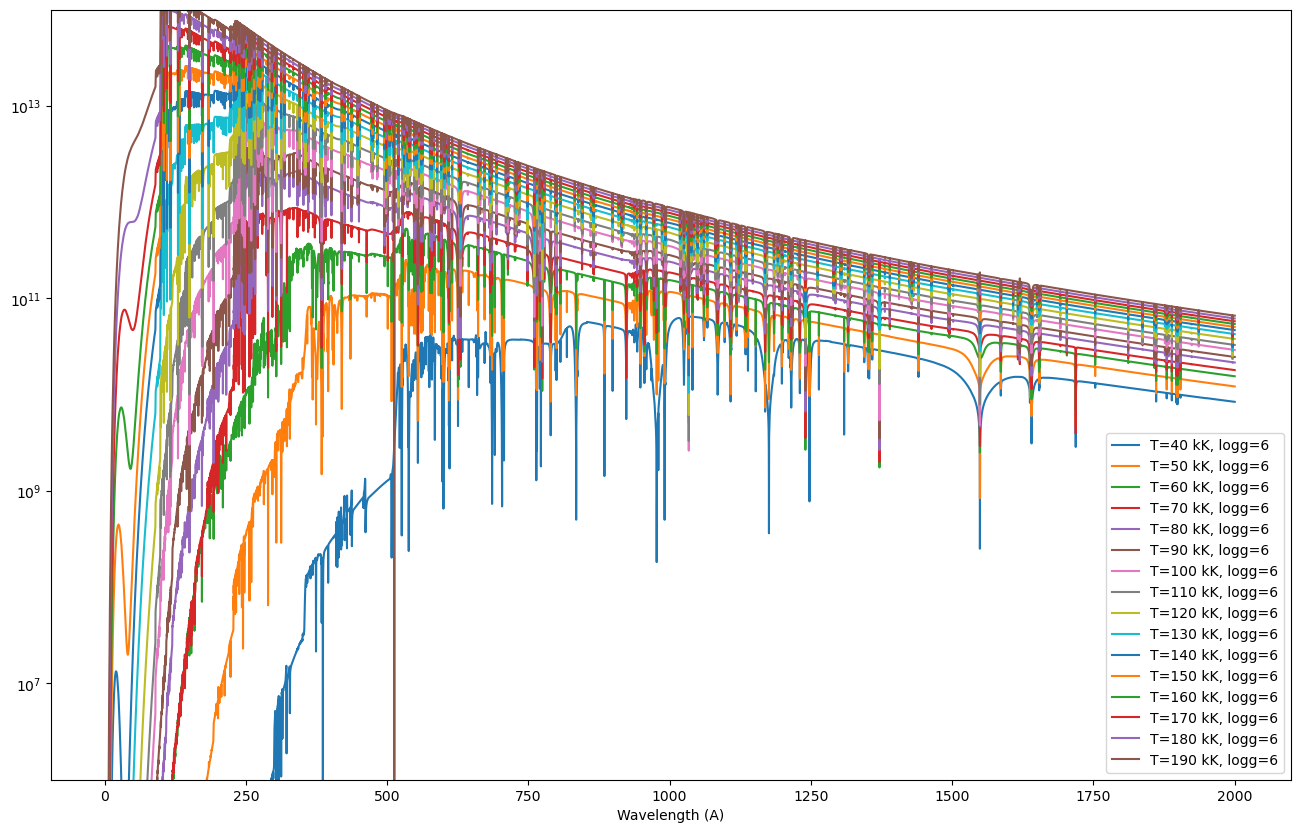

In [37]:
fig, ax = plt.subplots(figsize=(16,10))
for sp in spectra: # easy to loop on the objects
    sp.plot_spr(ax=ax)
ax.legend(loc=4);

In [38]:
for sp in spectra:
    print('T = {:6.0f} K, integral: {:.2e}'.format(sp.T, sp.get_integ()))

T =  40000 K, integral: 4.00e+13
T =  50000 K, integral: 1.14e+14
T =  60000 K, integral: 2.23e+14
T =  70000 K, integral: 3.96e+14
T =  80000 K, integral: 7.25e+14
T =  90000 K, integral: 1.05e+15
T = 100000 K, integral: 1.79e+15
T = 110000 K, integral: 2.55e+15
T = 120000 K, integral: 3.72e+15
T = 130000 K, integral: 5.13e+15
T = 140000 K, integral: 6.93e+15
T = 150000 K, integral: 9.11e+15
T = 160000 K, integral: 1.18e+16
T = 170000 K, integral: 1.51e+16
T = 180000 K, integral: 1.89e+16
T = 190000 K, integral: 2.35e+16


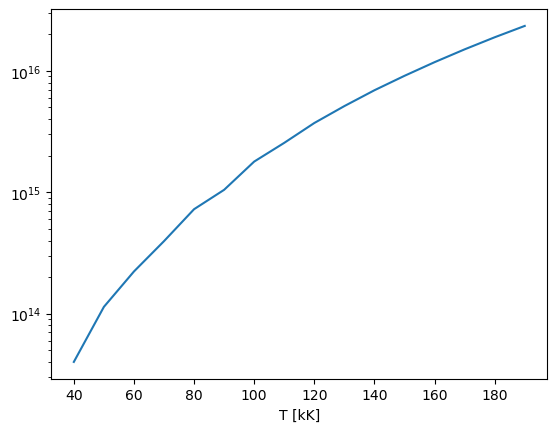

In [39]:
# using list comprehension to compute on the fly the coordinates of the plot:
plt.semilogy([sp.T/1e3 for sp in spectra], [sp.get_integ() for sp in spectra])
plt.xlabel('T [kK]');

In [40]:
# Better to put the values into a numpy array:
Ts = np.array([sp.T for sp in spectra])
Fs = np.array([sp.get_integ() for sp in spectra])

In [41]:
# check that the luminosity increase like sigma.T**4
from astropy import __version__ as astropyversion
print(astropyversion)

5.1


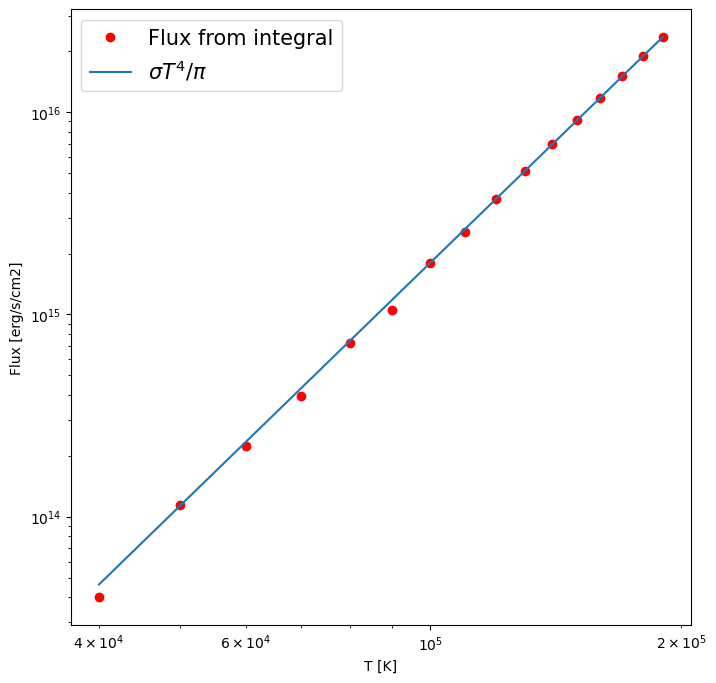

In [42]:
from astropy import constants # in real life, it is better to move this to the top of the program
sigma = constants.sigma_sb.to('erg/(s K4 cm2)') # convert Steffen-Boltzmann constant into cgs units
fig, ax = plt.subplots(figsize=(8,8))
ax.loglog(Ts, Fs, 'ro', label='Flux from integral')
ax.loglog(Ts, sigma.value * Ts**4 / np.pi, label=r'$\sigma T^4 / \pi$') # overplot sigma . T^4 / pi
ax.legend(loc=2, fontsize=15)
ax.set_xlabel('T [K]')
ax.set_ylabel('Flux [erg/s/cm2]');

### Using \*args and **kwargs in functions

This allows to pass arguments (without and with keyword respectively) to function. No need to know what are the arguments when desining the function.

In [43]:
class Stel_Spectrum(object):
    """
    This object downloads a file from http://astro.uni-tuebingen.de/~rauch/TMAF/NLTE/He+C+N+O/
    and is able to make some plots.    
    """
    def __init__(self, filename=None, T=None, logg=None):
        """
        Initialisation of the Stel_Spectrum object.
        Parameter:
            - filename
            - T: temperature in K, e.g. 150000
            - logg: e.g. 7.5
        The wl variable is an array of wavelengths in Angstrom.
        The fl variable is the flux in erg/s/cm2/A
        """
        if filename is None:
            if T is not None and logg is not None:
                self.T = T
                self.logg = logg
                self.filename = '0{0:06.0f}_{1:.2f}_33_50_02_15.bin_0.1.gz'.format(self.T, self.logg)
            else:
                raise TypeError("T and logg must be given")
        else:
            self.filename = filename
            self.T = float(filename.split('_')[0])
            self.logg = float(filename.split('_')[1])
        self.dlfile()
        if self.file_found:
            data = np.genfromtxt(self.filename, comments='*', names='wl, fl')
            self.fl = data['fl']
            self.wl = data['wl'] # in A
            self.fl /= 1e8 # F LAMBDA  GIVEN IN ERG/CM**2/SEC/CM -> erg/s/cm2/A
        else:
            self.wl = None
            self.fl = None
            
    def dlfile(self):
        """
        Downloading file if not already here. Put it in the curremt directory
        """
        if not os.path.exists(self.filename):
            print('Downloading {}'.format(self.filename))
            try:
                stel_file = urlopen('http://astro.uni-tuebingen.de/~rauch/TMAF/NLTE/He+C+N+O/' + 
                                            self.filename)
                output = open(self.filename,'wb')
                output.write(stel_file.read())
                output.close()
                self.file_found=True
            except:
                print('file {} not found'.format(self.filename))
                self.file_found=False
        else:
            self.file_found=True
                
    def plot_spr(self, ax=None, *args, **kwargs):
        """
        Plot the spectrum.
        Parameter:
            - ax: an axis (optionnal). If Noe or absent, axis is created
            - any extra parameter is passed to ax.plot
        """
        if self.wl is None:
            print('No data to plot')
            return
        if ax is None:
            fig, ax = plt.subplots()
        ax.plot(self.wl, self.fl,
                label='T3={0:.0f}, logg={1}'.format(self.T/1e3, self.logg),
                *args, **kwargs) # Here are the transmissions of extra parameters to plot
        ax.set_yscale('log')
        ax.set_ylim(1e6, 1e14)
        ax.set_xlabel('Wavelength (A)')
        
    def print_info(self):
        """
        Print out the filename and the number of points
        """
        print(self.__repr__())
        
    def __repr__(self):
        """
        This is what is used when calling "print <obj>" or <obj> ENTER
        """
        if self.wl is None:
            return'Filename: {0}, No data'.format(self.filename)
        else:
            return'Filename: {0}, number of points: {1}'.format(self.filename, len(self.wl))
    
    def get_integ(self):
        """
        Return the integral of Flambda over lambda, in erg/s/cm2
        """
        if self.wl is None:
            print('No data')
            return None
        return simps(self.fl, self.wl) # perform the integral
        

Filename: 0100000_5.00_33_50_02_15.bin_0.1.gz, number of points: 19951


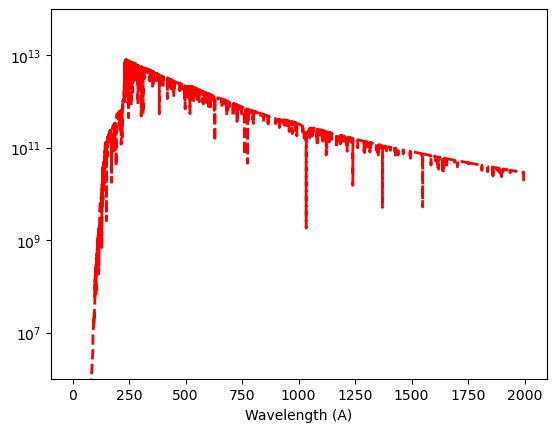

In [44]:
sp1 = Stel_Spectrum(T=100000, logg=5)
print(sp1)
fig, ax = plt.subplots()
sp1.plot_spr(ax, 'r', linewidth=2, linestyle='--') # any extra argument is passed to plot

### Class variables or class attributes

They are known and share between all the instanciations of a class. Usefull to count the number of objects of the same class.

In [45]:
class Stel_Spectrum(object):
    """
    This object downloads a file from http://astro.uni-tuebingen.de/~rauch/TMAF/NLTE/He+C+N+O/
    and is able to make some plots.    
    """
    
    spec_count = 0 # This attibute is at the level of the class, not of the object.
    def __init__(self, filename=None, T=None, logg=None, verbose=False):
        """
        Initialisation of the Stel_Spectrum object.
        Parameter:
            - filename
            - T: temperature in K, e.g. 150000
            - logg: e.g. 7.5
        The wl variable is an array of wavelengths in Angstrom.
        The fl variable is the flux in erg/s/cm2/A
        """
        self.verbose = verbose
        if filename is None:
            if T is not None and logg is not None:
                self.T = T
                self.logg = logg
                self.filename = '0{0:06.0f}_{1:.2f}_33_50_02_15.bin_0.1.gz'.format(self.T, self.logg)
            else:
                raise TypeError("T and logg must be given")
        else:
            self.filename = filename
            self.T = float(filename.split('_')[0])
            self.logg = float(filename.split('_')[1])
        self.dlfile()
        if self.file_found:
            data = np.genfromtxt(self.filename, comments='*', names='wl, fl')
            self.fl = data['fl']
            self.wl = data['wl'] # in A
            self.fl /= 1e8 # F LAMBDA  GIVEN IN ERG/CM**2/SEC/CM -> erg/s/cm2/A
            if verbose:
                print('Data read')
        else:
            self.wl = None
            self.fl = None
        Stel_Spectrum.spec_count += 1
        if self.verbose:
            print('Number of spectra: {}'.format(Stel_Spectrum.spec_count))
            
    def dlfile(self):
        """
        Downloading file if not already here. Put it in the curremt directory
        """
        if not os.path.exists(self.filename):
            print('Downloading {}'.format(self.filename))
            try:
                stel_file = urlopen('http://astro.uni-tuebingen.de/~rauch/TMAF/NLTE/He+C+N+O/' + 
                                            self.filename)
                output = open(self.filename,'wb')
                output.write(stel_file.read())
                output.close()
                self.file_found=True
            except:
                print('file {} not found'.format(self.filename))
                self.file_found=False
        else:
            self.file_found=True
                
    def plot_spr(self, ax=None, *args, **kwargs):
        """
        Plot the spectrum.
        Parameter:
            - ax: an axis (optionnal). If None or absent, axis is created
            - any extra parameter is passed to ax.plot
        """
        if self.wl is None:
            print('No data to plot')
            return
        if ax is None:
            fig, ax = plt.subplots()
        ax.plot(self.wl, self.fl,
                label='T3={0:.0f}, logg={1}'.format(self.T/1e3, self.logg),
                *args, **kwargs) # Here are the transmissions of extra parameters to plot
        ax.set_yscale('log')
        ax.set_ylim(1e6, 1e14)
        ax.set_xlabel('Wavelength (A)')
        
    def print_info(self):
        """
        Print out the filename and the number of points
        """
        print(self.__repr__())
        
    def __repr__(self):
        """
        This is what is used when calling "print <obj>" or <obj> ENTER
        """
        if self.wl is None:
            return'Filename: {0}, No data'.format(self.filename)
        else:
            return'Filename: {0}, number of points: {1}'.format(self.filename, len(self.wl))
    
    def get_integ(self):
        """
        Return the integral of Flambda over lambda, in erg/s/cm2
        """
        if self.wl is None:
            print('No data')
            return None
        return simps(self.fl, self.wl) # perform the integral
    
    def __del__(self):
        Stel_Spectrum.spec_count -= 1

In [46]:
sp1 = Stel_Spectrum(T=100000, logg=5, verbose=True)
sp2 = Stel_Spectrum(T=100000, logg=6, verbose=True)
sp3 = Stel_Spectrum(T=100000, logg=7, verbose=True)
print(Stel_Spectrum.spec_count)
print(sp3.spec_count)

Data read
Number of spectra: 1
Data read
Number of spectra: 2
Data read
Number of spectra: 3
3
3


In [47]:
del sp1
print(Stel_Spectrum.spec_count)

2


In [48]:
for logg in (5, 6, 7, 8):
    sp = Stel_Spectrum(T=100000, logg=logg)
print(Stel_Spectrum.spec_count) # the deleted objects are not count (it would have been the case without the __del__ method)

3


In [49]:
sp = 'tralala'
print(Stel_Spectrum.spec_count)

2


That can be used for example to change a value for a class variable used everywhere (e.g. the reddening correction to be applied to all the spectra before plotting them...)

### Adding functionnality to classes and objects (monkey-patch)

In [50]:
sp1 = Stel_Spectrum(T=100000, logg=5) # Instanciation of a class
def print_ok(): # defining a function outside the class
    print('ok')    
sp1.print_ok = print_ok # include the function to the object
sp1.print_ok() # works, the instance is modified

ok


In [51]:
def print_ok2(self):
    print(f'{self.T} K')   

In [52]:
sp2 = Stel_Spectrum(T=100000, logg=5) # Instanciation of a class    
sp2.print_ok2 = print_ok2
sp2.print_ok2()

TypeError: print_ok2() missing 1 required positional argument: 'self'

In [53]:
Stel_Spectrum.print_ok2 = print_ok2 # include the function to the class
sp1.print_ok2() # the class has been modified, and it applies immediatly on the already instatiated objects

print_ok2(sp1)

100000 K
100000 K


In [54]:
def print_info_ori(self):
    print(self.__repr__())
Stel_Spectrum.print_info_ori = print_info_ori

def print_info(self):
    print('NEW ONE: ',self.__repr__())
Stel_Spectrum.print_info = print_info
sp3 = Stel_Spectrum(T=100000, logg=6)
sp3.print_info_ori()
sp3.print_info()

Filename: 0100000_6.00_33_50_02_15.bin_0.1.gz, number of points: 19951
NEW ONE:  Filename: 0100000_6.00_33_50_02_15.bin_0.1.gz, number of points: 19951


In [55]:
sp2 = Stel_Spectrum(T=100000, logg=6)
sp2.print_ok2()
sp2.print_ok() # ERROR : the print_ok was only included to an object, not to the class

100000 K


AttributeError: 'Stel_Spectrum' object has no attribute 'print_ok'

In [56]:
def print_T(self): # self could have been named otherwise
    print(self.T)
sp1.print_T = print_T # adding to the object
sp1.print_T() # ERROR: the object has no self reference. Only doable with classes.

TypeError: print_T() missing 1 required positional argument: 'self'

In [57]:
Stel_Spectrum.print_T = print_T # Adding to the class
sp2 = Stel_Spectrum(T=100000, logg=5) # works immediatly
sp2.print_T()

100000


In [58]:
def print_T(self): # changing the definition of print_T
    print('T={}'.format(self.T))    
sp2.print_T() # does NOT affect the class nor the object

100000


In [59]:
Stel_Spectrum.print_T = print_T # Adding to the class
sp2.print_T() # now it changes the behaviour

T=100000


In [60]:
# The same function can also be called passing the object. Good for testing and developping
print_T(sp2)

T=100000


The monkey patch is usefull for testing purpose. When everything is working fine, better to incorporate the method to the class definition.

### Class inheritance

This is very easy to create a new class from an existing one.

In [61]:
class Stel_Sp2(Stel_Spectrum):

    def __init__(self, *args, **kwds):
        super(Stel_Sp2, self).__init__(*args, **kwds) 
        
    def print_logg(self):
        print('logg = {}'.format(self.logg))

0050000_7.00_33_50_02_15.bin_0.1.gz
logg = 7.0


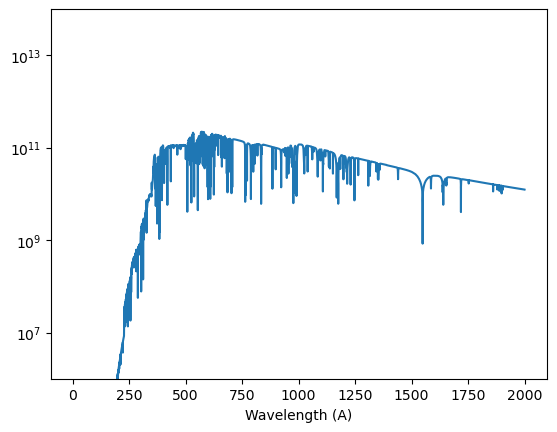

In [62]:
print(filename)
sp2 = Stel_Sp2(filename) 
sp2.plot_spr()
sp2.print_logg()

In [63]:
# One can even overwrite methods
class Stel_Sp2(Stel_Spectrum):

    def __init__(self, *args, **kwds):
        super(Stel_Sp2, self).__init__(*args, **kwds) 
        
    def print_logg(self):
        print('logg = {}'.format(self.logg))
    
    def print_info(self):
        """
        Print out new information
        """
        print('File: {}, T={}, logg={}'.format(filename, self.T, self.logg))

sp1 = Stel_Spectrum(T=100000, logg=5) 
sp2 = Stel_Sp2(T=100000, logg=5) 
sp1.print_info()
sp2.print_info()

NEW ONE:  Filename: 0100000_5.00_33_50_02_15.bin_0.1.gz, number of points: 19951
File: 0050000_7.00_33_50_02_15.bin_0.1.gz, T=100000, logg=5


One can mix inheritances, using multiple parents to generate children (!). A lot of examples on the web...

### Properties

It is sometimes useful to have things that behave like attributes (print A.b, A.c = 2), but that call some routines. This is the goal of the properties.

For example here, we want the data to be updated if one change T or logg.

In [64]:
class Stel_Spectrum(object):
    """
    This object downloads a file from http://astro.uni-tuebingen.de/~rauch/TMAF/NLTE/He+C+N+O/
    and is able to make some plots.    
    """
    
    spec_count = 0 # This attibute is at the level of the class, not of the object.
    def __init__(self, filename=None, T=None, logg=None, verbose=False):
        """
        Initialisation of the Stel_Spectrum object.
        Parameter:
            - filename
            - T: temperature in K, e.g. 150000
            - logg: e.g. 7.5
            - verbose: if True, some info are printed out
        The wl variable is an array of wavelengths in Angstrom.
        The fl variable is the flux in erg/s/cm2/A
        The variables T and logg are properties: changing them will reload the data
        """
        self.verbose = verbose
        if filename is None:
            if T is not None and logg is not None:
                self.__T = T # We need to initialize the hidden values, as logg is still not defined
                self.logg = logg
                self.filename = '0{0:06.0f}_{1:.2f}_33_50_02_15.bin_0.1.gz'.format(self.T, self.logg)
            else:
                raise TypeError("T and logg must be given")
        else:
            self.filename = filename
            self.__T = float(filename.split('_')[0]) # We need to initialize the hidden values, as logg is still not defined
            self.logg = float(filename.split('_')[1])
        Stel_Spectrum.spec_count += 1
        if self.verbose:
            print('Instantiation done')
            
    def dlfile(self):
        """
        Downloading file if not already here. Put it in the current directory
        """
        if not os.path.exists(self.filename):
            if self.verbose:
                print('Downloading {}'.format(self.filename))
            try:
                stel_file = urlopen('http://astro.uni-tuebingen.de/~rauch/TMAF/NLTE/He+C+N+O/' + 
                                            self.filename)
                output = open(self.filename,'wb')
                output.write(stel_file.read())
                output.close()
                self.file_found=True
            except:
                if self.verbose:
                    print('file {} not found'.format(self.filename))
                self.file_found=False
        else:
            if self.verbose:
                print('{} already on disk'.format(self.filename))
            self.file_found=True
                
    def read_data(self):
        """
        read the data from the file
        """
        if self.file_found:
            data = np.genfromtxt(self.filename, comments='*', names='wl, fl')
            self.fl = data['fl']
            self.wl = data['wl'] # in A
            self.fl /= 1e8 # F LAMBDA  GIVEN IN ERG/CM**2/SEC/CM -> erg/s/cm2/A
            if self.verbose:
                print('Read data from {}'.format(self.filename))
        else:
            if self.verbose:
                print('file not found {}'.format(self.filename))
            self.wl = None
            self.fl = None
        
    def plot_spr(self, ax=None, *args, **kwargs):
        """
        Plot the spectrum.
        Parameter:
            - ax: an axis (optionnal). If Noe or absent, axis is created
            - any extra parameter is passed to ax.plot
        """
        if self.wl is None:
            print('No data to plot')
            return
        if ax is None:
            fig, ax = plt.subplots()
        ax.plot(self.wl, self.fl,
                label='T3={0:.0f}, logg={1}'.format(self.T/1e3, self.logg),
                *args, **kwargs) # Here are the transmissions of extra parameters to plot
        ax.set_yscale('log')
        ax.set_ylim(1e6, 1e14)
        ax.set_xlabel('Wavelength (A)')
        
    def get_integ(self):
        """
        Return the integral of Flambda over lambda, in erg/s/cm2
        """
        if self.wl is None:
            print('No data')
            return None
        return simps(self.fl, self.wl) # perform the integral
    
    def __getT(self): 
        return self.__T
    
    def __setT(self, value): 
        if not isinstance(value, (int, float)): # check the type of the input
            raise TypeError('T must be an integer or a float')
        if float(value) not in np.linspace(40000, 190000, 16): # check the value of the input
            raise ValueError('T value must be between 40000 and 190000K, by 10000K steps')
        elif self.__T != value:
            self.__T = value
            self.filename = '0{0:06.0f}_{1:.2f}_33_50_02_15.bin_0.1.gz'.format(self.T, self.logg)
            self.dlfile() # will download new data
            self.read_data() # will update the data
        
    def __delT(self): 
        print('T is needed')
        
    T = property(__getT, __setT, __delT, "Stellar effective temperature in K")
    
    def __getlogg(self): 
        return self.__logg
    
    def __setlogg(self, value):
        try:
            self.__logg 
        except:
            self.__logg = -1
        if not isinstance(value, (int, float)):
            raise TypeError('logg must be an integer or a float')
        if float(value) not in (-1., 5., 6., 7. ,8., 9.):
            raise ValueError('Error, logg must be 6, 7, 8, or 9')
            self.__logg = None
        elif self.__logg != value:
            self.__logg = value
            self.filename = '0{0:06.0f}_{1:.2f}_33_50_02_15.bin_0.1.gz'.format(self.T, self.logg)
            self.dlfile() # will download new data
            self.read_data() # will update the data
        
    def __dellogg(self): 
        print('logg is needed')
        
    logg = property(__getlogg, __setlogg, __dellogg, "Stellar logg")

    def print_info(self):
        """
        Print out the filename and the number of points
        """
        print(self.__repr__())
        
    def __repr__(self):
        """
        This is what is used when calling "print <obj>" or <obj> ENTER
        """
        if self.wl is None:
            return'Filename: {0}, No data'.format(self.filename)
        else:
            return'Filename: {0}, number of points: {1}'.format(self.filename, len(self.wl))
    
    def __del__(self):
        Stel_Spectrum.spec_count -= 1

0050000_6.00_33_50_02_15.bin_0.1.gz already on disk
Read data from 0050000_6.00_33_50_02_15.bin_0.1.gz
Instantiation done
50000


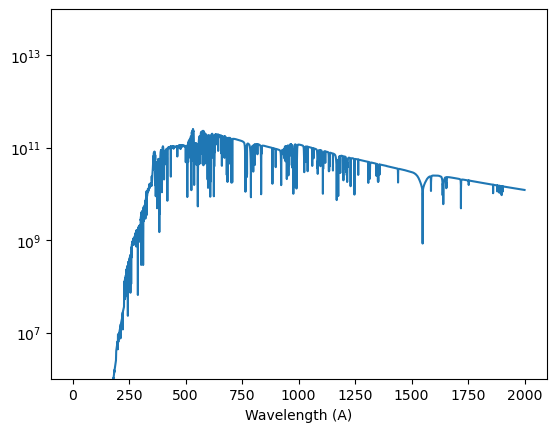

In [65]:
sp2 = Stel_Spectrum(T=50000, logg=6, verbose=True)
print(sp2.T)
sp2.plot_spr()

In [66]:
# The properties are used to control type and values of the inputs
sp2.T = 1800

ValueError: T value must be between 40000 and 190000K, by 10000K steps

In [67]:
sp2.logg = 'tralala'

TypeError: logg must be an integer or a float

In [68]:
sp2.T = 180000
sp2.logg = 7
print(sp2)
print(sp2.T)

0180000_6.00_33_50_02_15.bin_0.1.gz already on disk
Read data from 0180000_6.00_33_50_02_15.bin_0.1.gz
Read data from 0180000_7.00_33_50_02_15.bin_0.1.gz
Filename: 0180000_7.00_33_50_02_15.bin_0.1.gz, number of points: 19951
180000


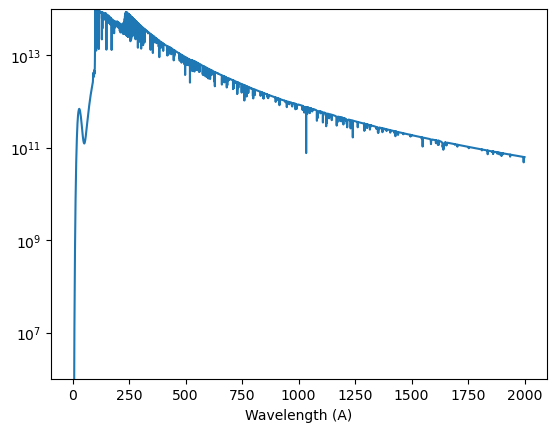

In [69]:
sp2.plot_spr()

In [70]:
del sp2.T

T is needed


In [71]:
sp2.T

180000

In [72]:
del sp2.filename

In [73]:
sp2.filename

AttributeError: 'Stel_Spectrum' object has no attribute 'filename'

In [74]:
print(sp2)

AttributeError: 'Stel_Spectrum' object has no attribute 'filename'

In [75]:
print(sp2.__T)

AttributeError: 'Stel_Spectrum' object has no attribute '__T'

In [76]:
sp2.T?

Type:        property
String form: <property object at 0x7f9d24a203b0>
Docstring:   Stellar effective temperature in K


In [77]:
sp2.fl?

Type:        ndarray
String form: [2.467e+02 4.019e+02 6.448e+02 ... 6.261e+10 6.260e+10 6.259e+10]
Length:      19951
File:        ~/anaconda3/envs/ML/lib/python3.9/site-packages/numpy/__init__.py
Docstring:  
ndarray(shape, dtype=float, buffer=None, offset=0,
        strides=None, order=None)

An array object represents a multidimensional, homogeneous array
of fixed-size items.  An associated data-type object describes the
format of each element in the array (its byte-order, how many bytes it
occupies in memory, whether it is an integer, a floating point number,
or something else, etc.)

Arrays should be constructed using `array`, `zeros` or `empty` (refer
to the See Also section below).  The parameters given here refer to
a low-level method (`ndarray(...)`) for instantiating an array.

For more information, refer to the `numpy` module and examine the
methods and attributes of an array.

Parameters
----------
(for the __new__ method; see Notes below)

shape : tuple of ints
    Shape 